# Integrantes:

Miguel Silva Souza,
Pedro Augusto Marinho,
Vinicius Porcionato

#Importação dos Dados

In [31]:
# Tratamento dos dados
import numpy as np
import pandas as pd
import joblib

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns


from sklearn.model_selection import cross_val_score


# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

In [32]:

# Recebendo os dados:
data_google_id = '1ND6YYlWajD7UOEErmkb8NzZBkTPSU2lN'
gdd(file_id=data_google_id,
    dest_path = './dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True)

# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a
dados = pd.read_csv("dados.csv", sep = ',')

# Exploração dos Dados

Análise exploratória dos dados


In [33]:
dados.head()

,nivel_ruido,gases_toxicos,horas_turno,iluminacao,epis_usado,setor,clima,risco
0,97.0,8.831141,8.0,513.0,não,pintura,moderado,alto
1,76.0,30.308022,10.0,174.0,não,montagem,moderado,alto
2,95.0,39.436406,9.0,761.0,sim,pintura,frio,alto
3,97.0,37.261701,11.0,207.0,sim,montagem,moderado,alto
4,82.0,45.526084,6.0,323.0,não,soldagem,moderado,alto


In [34]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nivel_ruido    4725 non-null   float64
 1   gases_toxicos  4769 non-null   float64
 2   horas_turno    4756 non-null   float64
 3   iluminacao     4761 non-null   float64
 4   epis_usado     4768 non-null   object 
 5   setor          4727 non-null   object 
 6   clima          4769 non-null   object 
 7   risco          4769 non-null   object 
dtypes: float64(4), object(4)
memory usage: 312.6+ KB


## Verificação de valores nulos

In [35]:
dados.isnull().sum()

,0
nivel_ruido,275
gases_toxicos,231
horas_turno,244
iluminacao,239
epis_usado,232
setor,273
clima,231
risco,231


## Geração de estatísticas descritivas (média, desvio, mínimo/máximo).

In [36]:
dados.describe().T[['mean','std','min','max']]

,mean,std,min,max
nivel_ruido,94.601693,14.486953,70.000000,119.000000
gases_toxicos,25.085388,14.555502,0.051556,49.990289
horas_turno,8.451640,1.700490,6.000000,11.000000
iluminacao,553.387734,261.088620,100.000000,999.000000


##Visualizações simples dos dados com gráficos

array([[<Axes: title={'center': 'nivel_ruido'}>,
        <Axes: title={'center': 'gases_toxicos'}>],
       [<Axes: title={'center': 'horas_turno'}>,
        <Axes: title={'center': 'iluminacao'}>]], dtype=object)

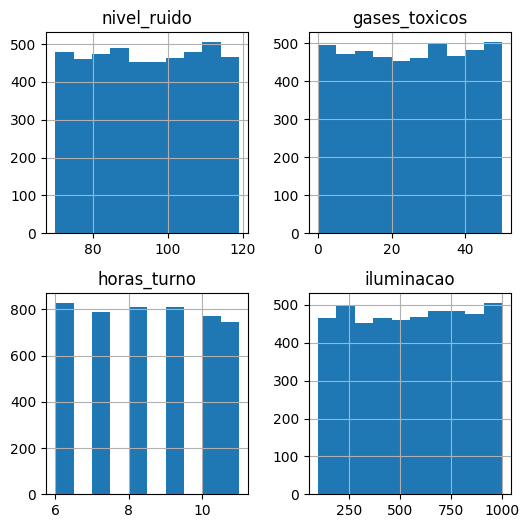

In [37]:
dados.hist(figsize=(6,6))

#Tratamento dos dados

## Substituir os valores nulos pela mediana ou moda

In [38]:
for column in dados.columns:
    if dados[column].dtype == 'object':
        dados[column].fillna(dados[column].mode()[0], inplace=True)
    else:
        dados[column].fillna(dados[column].median(), inplace=True)

dados.isnull().sum()

/tmp/ipython-input-2070342502.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados[column].fillna(dados[column].median(), inplace=True)
/tmp/ipython-input-2070342502.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,0
nivel_ruido,0
gases_toxicos,0
horas_turno,0
iluminacao,0
epis_usado,0
setor,0
clima,0
risco,0


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Converter textos em números – Label Encoding / One Hot Encoding e remover alguma coluna que PODE ser desnecessária

In [40]:
dados['epis_usado'].unique()

array(['não', 'sim'], dtype=object)

In [41]:
dados['epis_usado'] = dados['epis_usado'].map({'sim':1,'não':0})

In [42]:
dados['risco'].unique()

array(['alto', 'baixo'], dtype=object)

In [43]:
dados['risco'] = dados['risco'].map({'alto':1,'baixo':0})

In [44]:
dados['setor'].unique()

array(['pintura', 'montagem', 'soldagem'], dtype=object)

In [45]:
dados['clima'].unique()

array(['moderado', 'frio', 'quente'], dtype=object)

In [46]:
setores = pd.get_dummies(dados["setor"], prefix = "setor", dtype=int)
setores.head()

,setor_montagem,setor_pintura,setor_soldagem
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1


In [47]:
climas = pd.get_dummies(dados["clima"], prefix = "clima", dtype=int)
climas.head()

,clima_frio,clima_moderado,clima_quente
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [48]:
dados_corrigidos = pd.concat([dados, setores, climas], axis=1)
dados_corrigidos.head()

,nivel_ruido,gases_toxicos,horas_turno,iluminacao,epis_usado,setor,clima,risco,setor_montagem,setor_pintura,setor_soldagem,clima_frio,clima_moderado,clima_quente
0,97.0,8.831141,8.0,513.0,0,pintura,moderado,1,0,1,0,0,1,0
1,76.0,30.308022,10.0,174.0,0,montagem,moderado,1,1,0,0,0,1,0
2,95.0,39.436406,9.0,761.0,1,pintura,frio,1,0,1,0,1,0,0
3,97.0,37.261701,11.0,207.0,1,montagem,moderado,1,1,0,0,0,1,0
4,82.0,45.526084,6.0,323.0,0,soldagem,moderado,1,0,0,1,0,1,0


In [49]:
dados_corrigidos.drop(columns=['setor', 'clima'], inplace = True)

In [50]:
dados_corrigidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nivel_ruido     5000 non-null   float64
 1   gases_toxicos   5000 non-null   float64
 2   horas_turno     5000 non-null   float64
 3   iluminacao      5000 non-null   float64
 4   epis_usado      5000 non-null   int64  
 5   risco           5000 non-null   int64  
 6   setor_montagem  5000 non-null   int64  
 7   setor_pintura   5000 non-null   int64  
 8   setor_soldagem  5000 non-null   int64  
 9   clima_frio      5000 non-null   int64  
 10  clima_moderado  5000 non-null   int64  
 11  clima_quente    5000 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 468.9 KB


## Normalização ou Padronização + Justificativa da escolha entre as duas opções

In [51]:
X = dados_corrigidos.drop('risco', axis=1)
y = dados_corrigidos['risco']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

### Optamos por aplicar a padronização em vez da normalização. A padronização foi escolhida porque os atributos apresentam escalas diferentes e podem ter outliers. Utilizando a padronização permitimos que os classificadores trabalhem de forma equilibrada.

In [52]:
# Aplicando a Padronização dos Dados
# Encontrando os minimos e maximos de cada uma das nossas colunas
scaler = StandardScaler().fit(X_train)
# Mudando a escala dos dados
X_train_pad = scaler.transform(X_train)
X_test_pad = scaler.transform(X_test)

In [53]:
X_train_pad_df = pd.DataFrame(data=X_train_pad, columns=X_train.columns)
X_train_pad_df.head()

,nivel_ruido,gases_toxicos,horas_turno,iluminacao,epis_usado,setor_montagem,setor_pintura,setor_soldagem,clima_frio,clima_moderado,clima_quente
0,1.752476,-1.440161,-0.263821,-0.360956,-0.952007,1.288245,-0.679248,-0.667595,-0.667595,-0.772474,1.464464
1,-0.885353,0.812778,-0.263821,0.341839,-0.952007,1.288245,-0.679248,-0.667595,1.497913,-0.772474,-0.682844
2,0.397915,-0.502582,-1.464566,1.178126,1.050412,1.288245,-0.679248,-0.667595,1.497913,-0.772474,-0.682844
3,-0.671475,-0.647978,-0.263821,0.530298,-0.952007,-0.776250,1.472216,-0.667595,1.497913,-0.772474,-0.682844
4,1.324720,-0.508619,-0.263821,-1.688022,-0.952007,-0.776250,1.472216,-0.667595,-0.667595,-0.772474,1.464464


In [54]:
X_train_pad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nivel_ruido     3500 non-null   float64
 1   gases_toxicos   3500 non-null   float64
 2   horas_turno     3500 non-null   float64
 3   iluminacao      3500 non-null   float64
 4   epis_usado      3500 non-null   float64
 5   setor_montagem  3500 non-null   float64
 6   setor_pintura   3500 non-null   float64
 7   setor_soldagem  3500 non-null   float64
 8   clima_frio      3500 non-null   float64
 9   clima_moderado  3500 non-null   float64
 10  clima_quente    3500 non-null   float64
dtypes: float64(11)
memory usage: 300.9 KB


Text(0.5, 1.0, 'Após a Padronização')

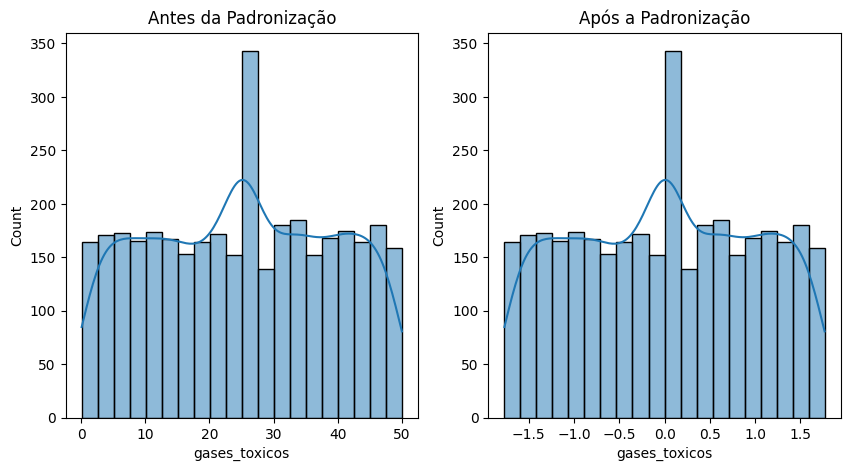

In [55]:
#Definindo a região do plot do gráfico (1 linhas, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=X_train, x="gases_toxicos", bins=20, kde = True, ax=axes[0])
sns.histplot(data=X_train_pad_df, x="gases_toxicos", bins=20, kde = True, ax=axes[1])
axes[0].set_title("Antes da Padronização")
axes[1].set_title("Após a Padronização")

Text(0.5, 1.0, 'Após a Padronização')

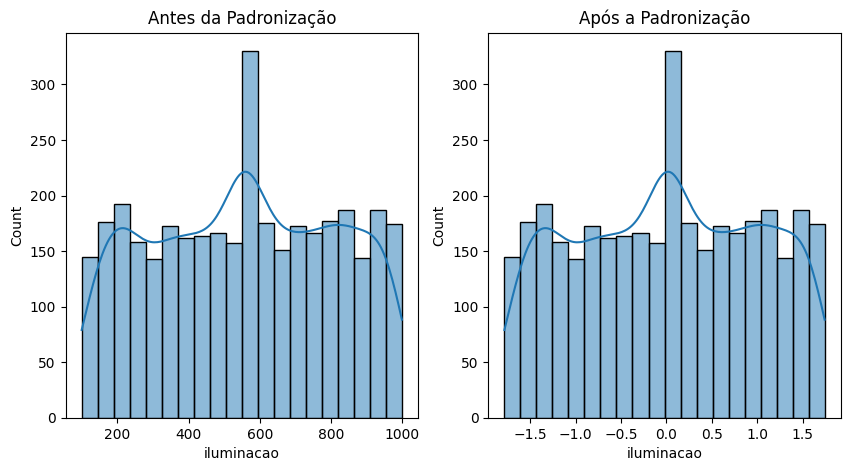

In [56]:
#Definindo a região do plot do gráfico (1 linhas, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=X_train, x="iluminacao", bins=20, kde = True, ax=axes[0])
sns.histplot(data=X_train_pad_df, x="iluminacao", bins=20, kde = True, ax=axes[1])
axes[0].set_title("Antes da Padronização")
axes[1].set_title("Após a Padronização")

#Treinamento dos modelos e métricas de desempenho

## Treinamento de 5 modelos diferentes de Machine Learning para problema.
## Obtendo as métricas de desempenho (matriz de confusão, precisão, revocação,f1-score, acurácia) para todos os modelos treinados.

--- TREINANDO E AVALIANDO: Regressão Logística ---

Relatório de Classificação:
              precision    recall  f1-score   support

 Baixo Risco       0.76      0.60      0.67       201
  Alto Risco       0.94      0.97      0.95      1299

    accuracy                           0.92      1500
   macro avg       0.85      0.79      0.81      1500
weighted avg       0.92      0.92      0.92      1500

Matriz de Confusão:


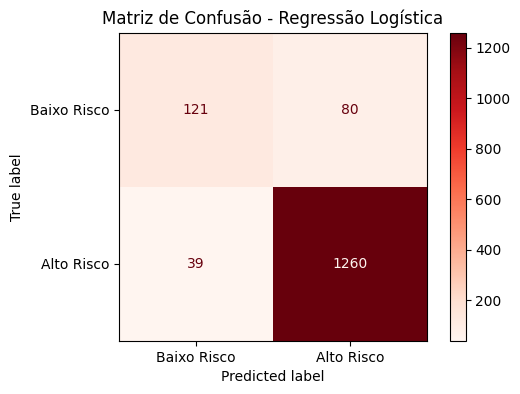

------------------------------------------------------------

--- TREINANDO E AVALIANDO: Árvore de Decisão ---

Relatório de Classificação:
              precision    recall  f1-score   support

 Baixo Risco       0.88      0.87      0.87       201
  Alto Risco       0.98      0.98      0.98      1299

    accuracy                           0.97      1500
   macro avg       0.93      0.92      0.93      1500
weighted avg       0.97      0.97      0.97      1500

Matriz de Confusão:


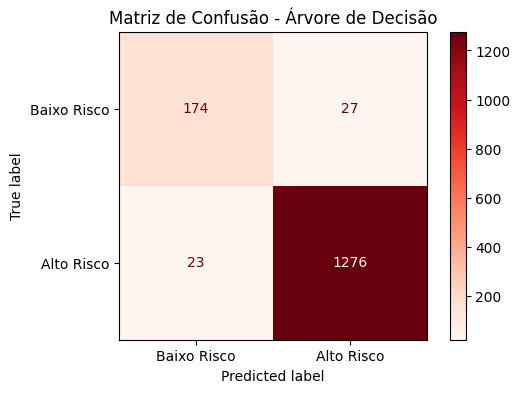

------------------------------------------------------------

--- TREINANDO E AVALIANDO: Random Forest ---

Relatório de Classificação:
              precision    recall  f1-score   support

 Baixo Risco       0.93      0.91      0.92       201
  Alto Risco       0.99      0.99      0.99      1299

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Matriz de Confusão:


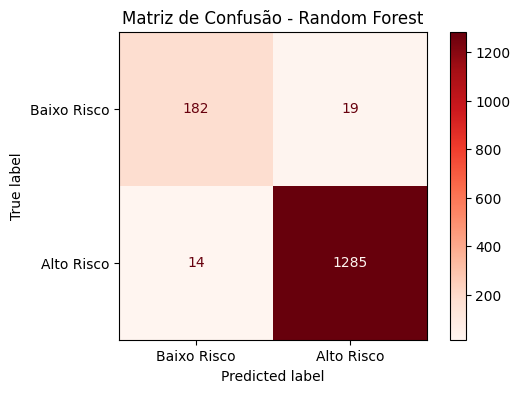

------------------------------------------------------------

--- TREINANDO E AVALIANDO: KNN ---

Relatório de Classificação:
              precision    recall  f1-score   support

 Baixo Risco       0.82      0.66      0.73       201
  Alto Risco       0.95      0.98      0.96      1299

    accuracy                           0.93      1500
   macro avg       0.88      0.82      0.85      1500
weighted avg       0.93      0.93      0.93      1500

Matriz de Confusão:


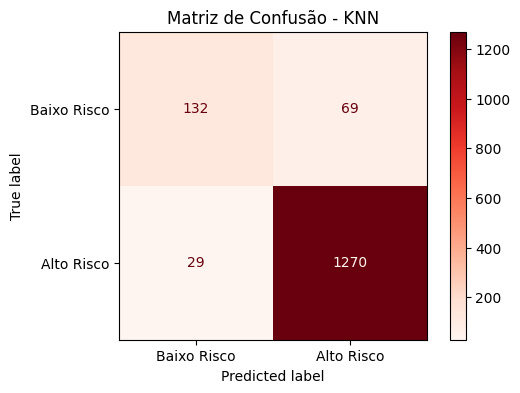

------------------------------------------------------------

--- TREINANDO E AVALIANDO: Gradient Boosting ---

Relatório de Classificação:
              precision    recall  f1-score   support

 Baixo Risco       0.93      0.93      0.93       201
  Alto Risco       0.99      0.99      0.99      1299

    accuracy                           0.98      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.98      0.98      0.98      1500

Matriz de Confusão:


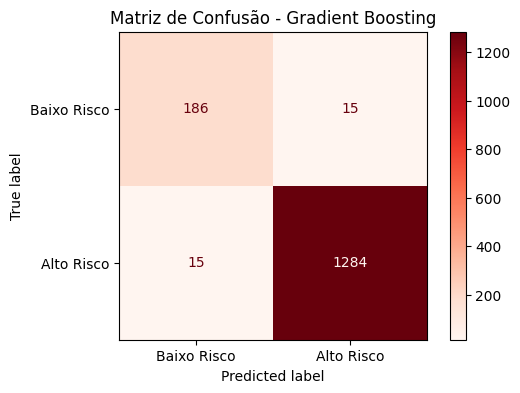

------------------------------------------------------------



In [57]:

# Criando um dicionário com os modelos que vamos treinar
models = {
    "Regressão Logística": LogisticRegression(),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Loop para treinar e avaliar cada modelo
for model_name, model in models.items():
    print(f"--- TREINANDO E AVALIANDO: {model_name} ---")

    # 1. Treinar o modelo
    model.fit(X_train_pad, y_train)

    # 2. Fazer previsões
    y_pred = model.predict(X_test_pad)

    # 3. Apresentar o Relatório de Classificação
    print("\nRelatório de Classificação:")
    # Definindo os nomes das classes para o relatório
    target_names = ["Baixo Risco", "Alto Risco"]
    print(classification_report(y_test, y_pred, target_names=target_names))

    # 4. Apresentar a Matriz de Confusão com legendas melhoradas
    print("Matriz de Confusão:")
    fig, ax = plt.subplots(figsize=(6, 4))

    # Usando o parâmetro 'display_labels' para nomear os eixos
    ConfusionMatrixDisplay.from_estimator(model,
                                          X_test_pad,
                                          y_test,
                                          cmap='Reds',
                                          ax=ax,
                                          display_labels=target_names)

    plt.title(f"Matriz de Confusão - {model_name}")
    plt.show()

    print("-" * 60 + "\n")

## Elaboração da curva ROC e obtenção do ROC-AUC. Avaliar o desempenho do seu modelo a partir dessa métrica

Modelo: Regressão Logística
Valor da ROC-AUC: 0.9469

Modelo: Árvore de Decisão
Valor da ROC-AUC: 0.9240

Modelo: Random Forest
Valor da ROC-AUC: 0.9866

Modelo: KNN
Valor da ROC-AUC: 0.9435

Modelo: Gradient Boosting
Valor da ROC-AUC: 0.9929



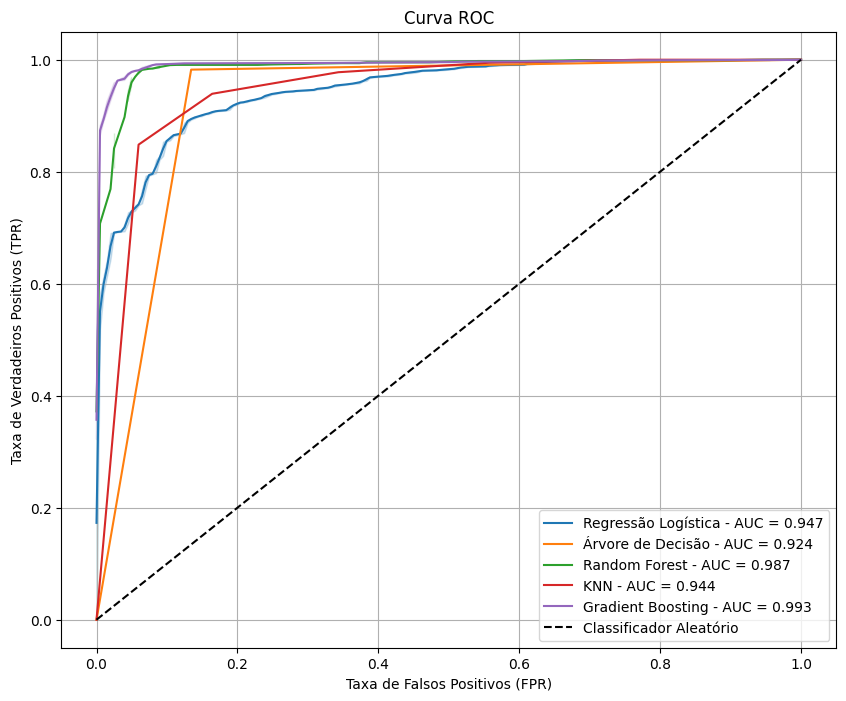

In [58]:
plt.figure(figsize=(10, 8))

for model_name, model in models.items():

    y_score = model.predict_proba(X_test_pad)[:, 1]

    roc_auc = roc_auc_score(y_test, y_score)
    print(f"Modelo: {model_name}")
    print(f"Valor da ROC-AUC: {roc_auc:.4f}\n")

    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)

    sns.lineplot(x=fpr, y=tpr, label=f"{model_name} - AUC = {roc_auc:.3f}")

plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')


plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#Conclusões da atividade e Qualidade do trabalho

Neste trabalho comparamos vários classificadores para prever o nível de risco operacional (alto / baixo). Após preparação dos dados (tratamento de valores nulos por mediana/moda, codificação das variáveis categóricas e padronização das variáveis numéricas) e divisão em treino/teste, foram treinados Regressão Logística, Árvore de Decisão, Random Forest, KNN, Gradient Boosting.

Das métricas avaliadas (matriz de confusão, acurácia, precisão, revocação, F1 e ROC-AUC), o Gradient Boosting apresentou o melhor resultado entre acurácia e capacidade de detectar riscos.

**Impacto para a empresa:**

Os modelos podem ser utilizados como um sistema de alerta, sinalizando operações com maior probabilidade de apresentar risco alto. Isso permite priorizar intervenções e uso de EPIs. A adoção reduziria incidentes operacionais e traria maior segurança para os técnicos.

**Falsos negativos x Falsos positivos:**

Falsos negativos (classificar 'alto' como 'baixo') são os piores nesse caso, pois representam situações de risco que o sistema não identificou, podendo causar acidentes ou lesões. Portanto, damos prioridade a aumentar o recall para a classe "alto", mesmo que isso gere mais falsos positivos.

Falsos positivos (classificar 'baixo' como 'alto') podem gerar mais custo, mas são preferíveis aos falsos negativos do ponto de vista de segurança.


#Utilização do modelo salvo

In [59]:
import joblib

melhor_modelo = models['Gradient Boosting']
padronizador = scaler

joblib.dump(melhor_modelo, 'gradient_boosting_model.pkl')
joblib.dump(padronizador, 'scaler.pkl')

['scaler.pkl']

In [ ]:
load_model = joblib.load('gradient_boosting_model.pkl')
load_scaler = joblib.load('scaler.pkl')


colunas_do_modelo = [
    'nivel_ruido', 'gases_toxicos', 'horas_turno', 'iluminacao', 'epis_usado',
    'setor_montagem', 'setor_pintura', 'setor_soldagem',
    'clima_frio', 'clima_moderado', 'clima_quente'
]

print("\n--- Por favor, insira os dados para a previsão de risco ---")

data_user = {}

data_user['nivel_ruido'] = float(input("Insira o nível de ruído (ex: 95.0): "))
data_user['gases_toxicos'] = float(input("Insira o nível de gases tóxicos (ex: 39.4): "))
data_user['horas_turno'] = float(input("Insira o número de horas no turno (ex: 9.0): "))
data_user['iluminacao'] = float(input("Insira o nível de iluminação (ex: 761.0): "))
data_user['epis_usado'] = int(input("O EPI é usado? (1 para sim, 0 para não): "))

print("\n--- Setor de Trabalho ---")
data_user['setor_montagem'] = int(input("É o setor de montagem? (1 para sim, 0 para não): "))
data_user['setor_pintura'] = int(input("É o setor de pintura? (1 para sim, 0 para não): "))
data_user['setor_soldagem'] = int(input("É o setor de soldagem? (1 para sim, 0 para não): "))


print("\n--- Clima no Ambiente ---")
data_user['clima_frio'] = int(input("O clima é frio? (1 para sim, 0 para não): "))
data_user['clima_moderado'] = int(input("O clima é moderado? (1 para sim, 0 para não): "))
data_user['clima_quente'] = int(input("O clima é quente? (1 para sim, 0 para não): "))

input_df = pd.DataFrame([data_user])
input_df = input_df[colunas_do_modelo]


input_padronizado = load_scaler.transform(input_df)

previsao = load_model.predict(input_padronizado)
previsao_proba = load_model.predict_proba(input_padronizado)


print("\n--- Resultado da Previsão ---")
if previsao[0] == 1:
    print("Previsão: Alto Risco")
else:
    print("Previsão: Baixo Risco")



--- Por favor, insira os dados para a previsão de risco ---
